In [1]:
import geopandas as gpd
CCED = gpd.read_file('../data/CCED1/CCED_California_Conservation_Easement_Database.shp')

In [2]:
import plotly.express as px

In [3]:
CCED.head()

ease_label                 sitename  \
0  Conservation Easement  Forest Service Easement   
1  Conservation Easement  Forest Service Easement   
2  Conservation Easement  Forest Service Easement   
3  Conservation Easement  Forest Service Easement   
4  Conservation Easement  Forest Service Easement   

                       esmthldr eholdtyp pubaccess   duration comments  \
0  United States Forest Service  Federal    Closed  Permanent     None   
1  United States Forest Service  Federal    Closed  Permanent     None   
2  United States Forest Service  Federal    Closed  Permanent     None   
3  United States Forest Service  Federal    Closed  Permanent     None   
4  United States Forest Service  Federal    Closed  Permanent     None   

  projectid dtmboardap          county  ... s_emthd1    ShapeSTLen  OBJECTID  \
0      None       None       San Diego  ...     None  13904.975825         1   
1      None       None       San Diego  ...     None   4682.317029         2   
2      None       None       Riverside  ...     None   2862.369888         3   
3      None       None  San Bernardino  ...     None   1702.694201         4   
4      None       None       El Dorado  ...     None    355.721294         5   

   e_type    Shape_Leng  OBJECTID_1    Shape_Le_1  \
0    None  11677.376353           1  11677.376353   
1    None   3906.326855           2   3906.326855   
2    None   2381.546995           3   2381.546995   
3    None   1406.940351           4   1406.940351   
4    None    276.692317           5    276.692317   

                                 GlobalID OBJECTID_2  \
0  {47F27121-F8E0-464A-8460-257E4815EC72}          1   
1  {4A76CAED-7EFA-4B3D-B60F-25077C8132F9}          2   
2  {4C17BE5C-00CE-456F-8CF0-259211A8DBA7}          3   
3  {A48635D1-6A10-419B-B5A2-12F0355E8EC5}          4   
4  {52689BFB-BBCA-4E4C-A224-6A334B158035}          5   

                                            geometry  
0  MULTIPOLYGON Z (((-12986180.651 3863101.889 0....  
1  POLYGON Z ((-13004703.942 3936729.412 0.000, -...  
2  POLYGON Z ((-12985843.064 3982453.578 0.000, -...  
3  POLYGON Z ((-13046839.601 4059743.122 0.000, -...  
4  MULTIPOLYGON Z (((-13359781.503 4702478.829 0....  

[5 rows x 28 columns]

In [4]:
# make geometry that shows the easement boundaries into a center point
# took code from the internet. Makes a copy of original DF and makes the geomoetry into centroids

CCED_points = CCED.copy()
CCED_points["geometry"] = CCED_points["geometry"].centroid

In [5]:
# see if it made the change

CCED_points.head()

ease_label                 sitename  \
0  Conservation Easement  Forest Service Easement   
1  Conservation Easement  Forest Service Easement   
2  Conservation Easement  Forest Service Easement   
3  Conservation Easement  Forest Service Easement   
4  Conservation Easement  Forest Service Easement   

                       esmthldr eholdtyp pubaccess   duration comments  \
0  United States Forest Service  Federal    Closed  Permanent     None   
1  United States Forest Service  Federal    Closed  Permanent     None   
2  United States Forest Service  Federal    Closed  Permanent     None   
3  United States Forest Service  Federal    Closed  Permanent     None   
4  United States Forest Service  Federal    Closed  Permanent     None   

  projectid dtmboardap          county  ... s_emthd1    ShapeSTLen  OBJECTID  \
0      None       None       San Diego  ...     None  13904.975825         1   
1      None       None       San Diego  ...     None   4682.317029         2   
2      None       None       Riverside  ...     None   2862.369888         3   
3      None       None  San Bernardino  ...     None   1702.694201         4   
4      None       None       El Dorado  ...     None    355.721294         5   

   e_type    Shape_Leng  OBJECTID_1    Shape_Le_1  \
0    None  11677.376353           1  11677.376353   
1    None   3906.326855           2   3906.326855   
2    None   2381.546995           3   2381.546995   
3    None   1406.940351           4   1406.940351   
4    None    276.692317           5    276.692317   

                                 GlobalID OBJECTID_2  \
0  {47F27121-F8E0-464A-8460-257E4815EC72}          1   
1  {4A76CAED-7EFA-4B3D-B60F-25077C8132F9}          2   
2  {4C17BE5C-00CE-456F-8CF0-259211A8DBA7}          3   
3  {A48635D1-6A10-419B-B5A2-12F0355E8EC5}          4   
4  {52689BFB-BBCA-4E4C-A224-6A334B158035}          5   

                            geometry  
0  POINT (-12987009.331 3861418.083)  
1  POINT (-13004227.527 3937315.065)  
2  POINT (-12986313.853 3982695.203)  
3  POINT (-13046611.435 4059609.976)  
4  POINT (-13360829.408 4702945.992)  

[5 rows x 28 columns]

In [6]:
# need to break the point geometry into latitude and longitude
# took code from internet

CCED_points['cent_lon'] = CCED_points.geometry.x
CCED_points['cent_lat'] = CCED_points.geometry.y

In [7]:
# see if it made new columns with lat and long

CCED_points

ease_label                 sitename  \
0      Conservation Easement  Forest Service Easement   
1      Conservation Easement  Forest Service Easement   
2      Conservation Easement  Forest Service Easement   
3      Conservation Easement  Forest Service Easement   
4      Conservation Easement  Forest Service Easement   
...                      ...                      ...   
12292  Conservation Easement         Jacobsen Ranches   
12293  Conservation Easement           Ten Mile River   
12294  Conservation Easement             TNC Easement   
12295  Conservation Easement           Ten Mile River   
12296  Conservation Easement           Ten Mile River   

                                                esmthldr          eholdtyp  \
0                           United States Forest Service           Federal   
1                           United States Forest Service           Federal   
2                           United States Forest Service           Federal   
3                           United States Forest Service           Federal   
4                           United States Forest Service           Federal   
...                                                  ...               ...   
12292  Sonoma County Agricultural Preservation and Op...  Special District   
12293                             The Nature Conservancy         NonProfit   
12294                             The Nature Conservancy         NonProfit   
12295                 The Conservation Fund - California         NonProfit   
12296                 The Conservation Fund - California         NonProfit   

      pubaccess   duration comments projectid dtmboardap          county  ...  \
0        Closed  Permanent     None      None       None       San Diego  ...   
1        Closed  Permanent     None      None       None       San Diego  ...   
2        Closed  Permanent     None      None       None       Riverside  ...   
3        Closed  Permanent     None      None       None  San Bernardino  ...   
4        Closed  Permanent     None      None       None       El Dorado  ...   
...         ...        ...      ...       ...        ...             ...  ...   
12292    Closed    Unknown     None      None       None          Sonoma  ...   
12293    Closed    Unknown     None      None       None       Mendocino  ...   
12294    Closed    Unknown     None      None       None       Mendocino  ...   
12295    Closed    Unknown     None      None       None       Mendocino  ...   
12296    Closed    Unknown     None      None       None       Mendocino  ...   

      OBJECTID                 e_type    Shape_Leng  OBJECTID_1    Shape_Le_1  \
0            1                   None  11677.376353           1  11677.376353   
1            2                   None   3906.326855           2   3906.326855   
2            3                   None   2381.546995           3   2381.546995   
3            4                   None   1406.940351           4   1406.940351   
4            5                   None    276.692317           5    276.692317   
...        ...                    ...           ...         ...           ...   
12292        0  Agricultural Easement      0.000000       12304   2916.724267   
12293     2648                   None   9603.545529       12313   9603.545528   
12294     2776                   None  19392.853222       12314  19392.853222   
12295     3528                   None   2154.428836       12315   2154.428836   
12296     3531                   None   1157.857449       12316   1157.857449   

                                     GlobalID OBJECTID_2  \
0      {47F27121-F8E0-464A-8460-257E4815EC72}          1   
1      {4A76CAED-7EFA-4B3D-B60F-25077C8132F9}          2   
2      {4C17BE5C-00CE-456F-8CF0-259211A8DBA7}          3   
3      {A48635D1-6A10-419B-B5A2-12F0355E8EC5}          4   
4      {52689BFB-BBCA-4E4C-A224-6A334B158035}          5   
...                                       ...        ...   
12292  {27E3BEC5-A835-44A2-BAA

In [8]:
fig = px.scatter_mapbox(CCED_points,
                       lat='cent_lat',
                       lon='cent_lon',
                       mapbox_style="stamen-terrain")
fig.show()

# figure is coming up blank...

In [9]:
# double check if lat and long are the 
CCED_points.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 12297 entries, 0 to 12296
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ease_label  12297 non-null  object  
 1   sitename    12297 non-null  object  
 2   esmthldr    12297 non-null  object  
 3   eholdtyp    12297 non-null  object  
 4   pubaccess   12297 non-null  object  
 5   duration    12274 non-null  object  
 6   comments    1201 non-null   object  
 7   projectid   120 non-null    object  
 8   dtmboardap  201 non-null    object  
 9   county      12297 non-null  object  
 10  src_align   12297 non-null  object  
 11  src_attr    12235 non-null  object  
 12  cced_id     12297 non-null  int64   
 13  gis_acres   12297 non-null  float64 
 14  year_est    12297 non-null  int64   
 15  term        12297 non-null  int64   
 16  dataentry   2792 non-null   object  
 17  nced_uid    11319 non-null  object  
 18  s_emthd1    100 non-null    object  
 

In [10]:
# just see if it will work as a scatterplot at all

px.scatter(CCED_points,
          x='cent_lon',y='cent_lat',width=800, height=800)

In [11]:
px.scatter(CCED_points,
          x='cent_lon',y='cent_lat',color='eholdtyp', width=800, height=800,
          title="Spatial Distribution of Easements by Holder Type",
          labels={'eholdtyp':'Type'})

In [ ]:
import contextily as ctx

In [12]:
# is there something wrong with the projection?

CCED_points.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World - 85°S to 85°N
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

I don't know why it isn't working, my dataframe is in web mercator projection, which is what mapbox is. So the two should be able to work together? Maybe will try kepler.

In [14]:
# do I need to redefine as geodataframe?

map_points=gpd.GeoDataFrame(CCED_points, geometry=gpd.points_from_xy(CCED_points.cent_lon, CCED_points.cent_lat))

In [15]:
map_points.head()

ease_label                 sitename  \
0  Conservation Easement  Forest Service Easement   
1  Conservation Easement  Forest Service Easement   
2  Conservation Easement  Forest Service Easement   
3  Conservation Easement  Forest Service Easement   
4  Conservation Easement  Forest Service Easement   

                       esmthldr eholdtyp pubaccess   duration comments  \
0  United States Forest Service  Federal    Closed  Permanent     None   
1  United States Forest Service  Federal    Closed  Permanent     None   
2  United States Forest Service  Federal    Closed  Permanent     None   
3  United States Forest Service  Federal    Closed  Permanent     None   
4  United States Forest Service  Federal    Closed  Permanent     None   

  projectid dtmboardap          county  ... OBJECTID e_type    Shape_Leng  \
0      None       None       San Diego  ...        1   None  11677.376353   
1      None       None       San Diego  ...        2   None   3906.326855   
2      None       None       Riverside  ...        3   None   2381.546995   
3      None       None  San Bernardino  ...        4   None   1406.940351   
4      None       None       El Dorado  ...        5   None    276.692317   

   OBJECTID_1    Shape_Le_1                                GlobalID  \
0           1  11677.376353  {47F27121-F8E0-464A-8460-257E4815EC72}   
1           2   3906.326855  {4A76CAED-7EFA-4B3D-B60F-25077C8132F9}   
2           3   2381.546995  {4C17BE5C-00CE-456F-8CF0-259211A8DBA7}   
3           4   1406.940351  {A48635D1-6A10-419B-B5A2-12F0355E8EC5}   
4           5    276.692317  {52689BFB-BBCA-4E4C-A224-6A334B158035}   

  OBJECTID_2                           geometry      cent_lon      cent_lat  
0          1  POINT (-12987009.331 3861418.083) -1.298701e+07  3.861418e+06  
1          2  POINT (-13004227.527 3937315.065) -1.300423e+07  3.937315e+06  
2          3  POINT (-12986313.853 3982695.203) -1.298631e+07  3.982695e+06  
3          4  POINT (-13046611.435 4059609.976) -1.304661e+07  4.059610e+06  
4          5  POINT (-13360829.408 4702945.992) -1.336083e+07  4.702946e+06  

[5 rows x 30 columns]

In [16]:
# convert lat/lon's to floats?
map_points['cent_lat'] = map_points['cent_lat'].astype(float)
map_points['cent_lon'] = map_points['cent_lon'].astype(float)
map_points.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 12297 entries, 0 to 12296
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ease_label  12297 non-null  object  
 1   sitename    12297 non-null  object  
 2   esmthldr    12297 non-null  object  
 3   eholdtyp    12297 non-null  object  
 4   pubaccess   12297 non-null  object  
 5   duration    12274 non-null  object  
 6   comments    1201 non-null   object  
 7   projectid   120 non-null    object  
 8   dtmboardap  201 non-null    object  
 9   county      12297 non-null  object  
 10  src_align   12297 non-null  object  
 11  src_attr    12235 non-null  object  
 12  cced_id     12297 non-null  int64   
 13  gis_acres   12297 non-null  float64 
 14  year_est    12297 non-null  int64   
 15  term        12297 non-null  int64   
 16  dataentry   2792 non-null   object  
 17  nced_uid    11319 non-null  object  
 18  s_emthd1    100 non-null    object  
 

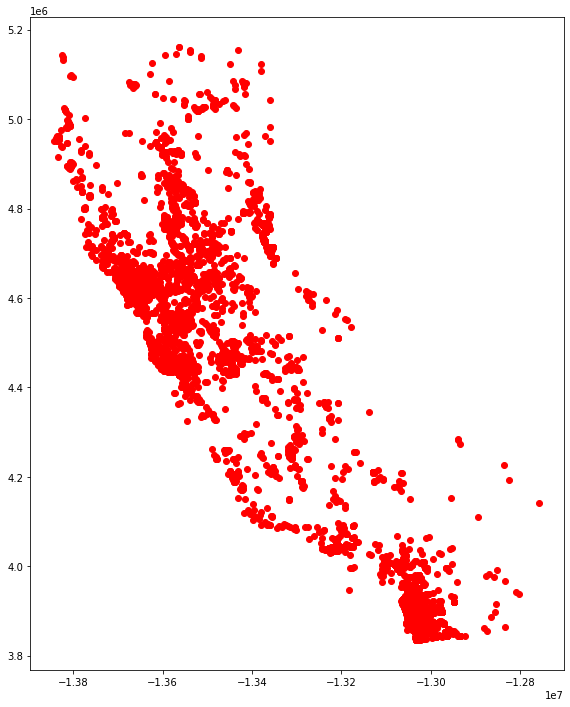

In [17]:
# does anything actually work? try basic geopandas plot
map_points.plot(figsize=(12,12),color='red')

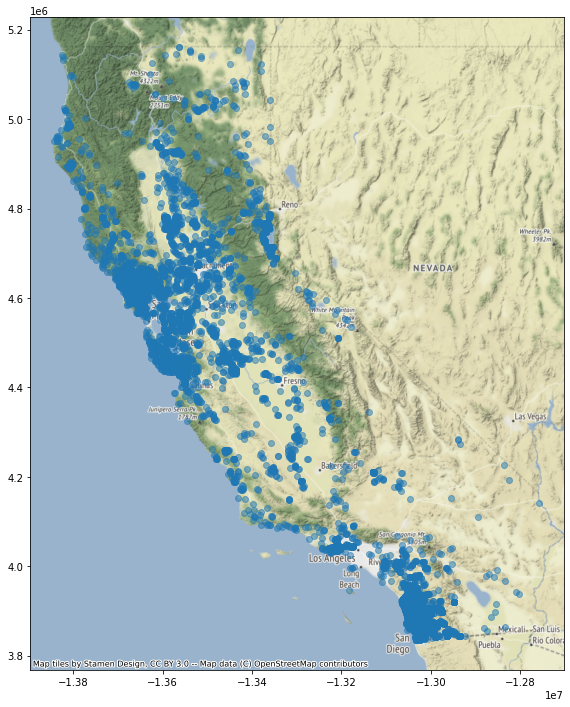

In [35]:
# ok, geopandas plot still works so just try to put a contextily basemap on

import contextily as ctx

ax = map_points.plot(figsize=(12, 12), alpha=0.5)
ctx.add_basemap(ax)

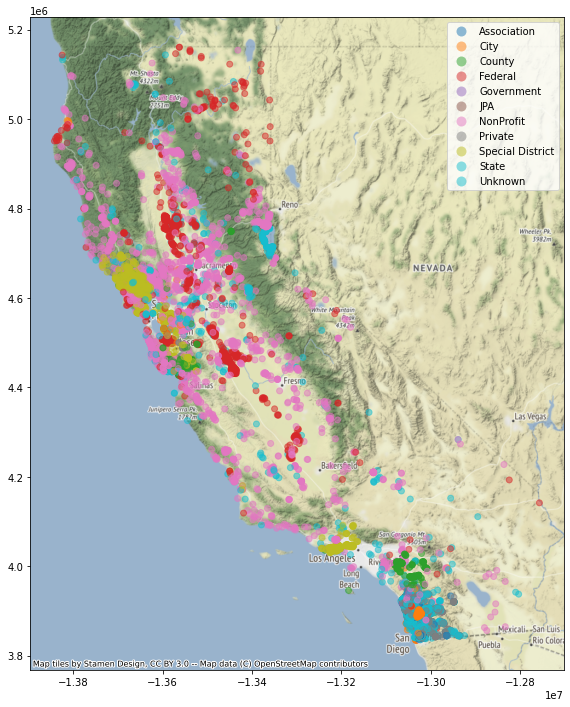

In [37]:
# try to make it color code on eholdyp 

ax = map_points.plot(column='eholdtyp',figsize=(12, 12), alpha=0.5, legend=True)
ctx.add_basemap(ax)

Praise the lord finally something worked

All this stuff below was me trying to set up the base layer of county boundaries. But it didn't work

In [24]:
cbounds=gpd.read_file('../data/counties/CA_counties.shp')

In [25]:
cbounds.head()

STATEFP COUNTYFP  COUNTYNS  GEOID             NAME                NAMELSAD  \
0      06      107  00277318  06107           Tulare           Tulare County   
1      06      009  01675885  06009        Calaveras        Calaveras County   
2      06      047  00277288  06047           Merced           Merced County   
3      06      079  00277304  06079  San Luis Obispo  San Luis Obispo County   
4      06      097  01657246  06097           Sonoma           Sonoma County   

  LSAD CLASSFP  MTFCC CSAFP CBSAFP METDIVFP FUNCSTAT        ALAND     AWATER  \
0   06      H1  G4020  None  47300     None        A  12494707314   37391604   
1   06      H1  G4020  None   None     None        A   2641820029   43810423   
2   06      H1  G4020  None  32900     None        A   5011554680  112760479   
3   06      H1  G4020  None  42020     None        A   8543230300  820974619   
4   06      H1  G4020   488  42220     None        A   4081430061  497530414   

      INTPTLAT      INTPTLON  \
0  +36.2288317  -118.7810618   
1  +38.1846184  -120.5593996   
2  +37.1948063  -120.7228019   
3  +35.3852268  -120.4475409   
4  +38.5250258  -122.9376050   

                                            geometry  
0  POLYGON ((-118.36059 36.74477, -118.36013 36.7...  
1  POLYGON ((-120.01995 38.43352, -120.02020 38.4...  
2  POLYGON ((-120.05205 37.18311, -120.05215 37.1...  
3  POLYGON ((-120.21398 35.78928, -120.20627 35.7...  
4  MULTIPOLYGON (((-122.51299 38.13180, -122.4956...

In [26]:
cbounds.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   STATEFP   58 non-null     object  
 1   COUNTYFP  58 non-null     object  
 2   COUNTYNS  58 non-null     object  
 3   GEOID     58 non-null     object  
 4   NAME      58 non-null     object  
 5   NAMELSAD  58 non-null     object  
 6   LSAD      58 non-null     object  
 7   CLASSFP   58 non-null     object  
 8   MTFCC     58 non-null     object  
 9   CSAFP     25 non-null     object  
 10  CBSAFP    46 non-null     object  
 11  METDIVFP  7 non-null      object  
 12  FUNCSTAT  58 non-null     object  
 13  ALAND     58 non-null     int64   
 14  AWATER    58 non-null     int64   
 15  INTPTLAT  58 non-null     object  
 16  INTPTLON  58 non-null     object  
 17  geometry  58 non-null     geometry
dtypes: geometry(1), int64(2), object(15)
memory usage: 8.3+ KB


In [27]:
cbounds=cbounds[['NAME','geometry']]

In [28]:
cbounds

NAME                                           geometry
0            Tulare  POLYGON ((-118.36059 36.74477, -118.36013 36.7...
1         Calaveras  POLYGON ((-120.01995 38.43352, -120.02020 38.4...
2            Merced  POLYGON ((-120.05205 37.18311, -120.05215 37.1...
3   San Luis Obispo  POLYGON ((-120.21398 35.78928, -120.20627 35.7...
4            Sonoma  MULTIPOLYGON (((-122.51299 38.13180, -122.4956...
5             Marin  MULTIPOLYGON (((-123.02325 38.29560, -123.0488...
6          Humboldt  POLYGON ((-123.66136 41.38209, -123.66089 41.3...
7              Mono  POLYGON ((-119.32840 38.53479, -119.30878 38.5...
8         Del Norte  POLYGON ((-123.51791 42.00085, -123.51793 42.0...
9            Colusa  POLYGON ((-121.89001 39.38386, -121.88995 39.3...
10          Alameda  POLYGON ((-121.55694 37.81722, -121.55695 37.8...
11        El Dorado  POLYGON ((-119.90432 38.93332, -119.90438 38.9...
12           Sutter  POLYGON ((-121.62376 39.29562, -121.62370 39.2...
13            Kings  POLYGON ((-119.53812 35.78957, -119.54529 35.7...
14           Sierra  POLYGON ((-120.14715 39.70766, -120.13577 39.7...
15           Lassen  POLYGON ((-119.99987 41.18397, -119.99987 41.1...
16             Lake  POLYGON ((-122.73906 39.38327, -122.75110 39.3...
17           Tehama  POLYGON ((-121.49764 40.44559, -121.49786 40.4...
18    San Francisco  MULTIPOLYGON (((-122.34647 37.72522, -122.3612...
19           Alpine  POLYGON ((-119.58544 38.71321, -119.58493 38.7...
20           Madera  POLYGON ((-119.26898 37.73923, -119.26858 37.7...
21       Sacramento  MULTIPOLYGON (((-121.74193 38.02564, -121.7444...
22    Santa Barbara  MULTIPOLYGON (((-119.96339 33.94776, -120.1091...
23           Plumas  POLYGON ((-121.32783 40.44537, -121.32002 40.4...
24            Modoc  POLYGON ((-120.87948 41.99378, -120.87601 41.9...
25           Solano  MULTIPOLYGON (((-122.14153 38.03186, -122.1431...
26          Ventura  POLYGON ((-118.88136 34.79063, -118.88031 34.7...
27       Santa Cruz  POLYGON ((-121.58135 36.89915, -121.58595 36.9...
28             Yuba  POLYGON ((-121.02209 39.39156, -121.02233 39.3...
29         Tuolumne  POLYGON ((-119.63920 38.32688, -119.64012 38.3...
30             Napa  MULTIPOLYGON (((-122.40233 38.15548, -122.4034...
31         Siskiyou  POLYGON ((-122.28953 42.00777, -122.28947 42.0...
32           Placer  POLYGON ((-120.00430 39.16560, -120.00402 39.1...
33            Glenn  POLYGON ((-122.04647 39.79765, -122.04559 39.7...
34          Trinity  POLYGON ((-122.49838 41.18268, -122.49834 41.1...
35             Inyo  POLYGON ((-117.83273 37.46493, -117.83149 37.4...
36       San Benito  POLYGON ((-121.21541 36.96125, -121.21454 36.9...
37         Monterey  POLYGON ((-121.64400 36.89400, -121.64400 36.8...
38        San Diego  POLYGON ((-116.08517 33.42593, -116.08516 33.4...
39         Mariposa  POLYGON ((-119.30899 37.77799, -119.31035 37.7...
40           Nevada  POLYGON ((-120.00377 39.44506, -120.00378 39.4...
41        Mendocino  POLYGON ((-123.54446 40.00192, -123.54450 40.0...
42             Yolo  POLYGON ((-121.83549 38.92448, -121.83388 38.9...
43         Imperial  POLYGON ((-114.62713 33.43355, -114.62717 33.4...
44       Stanislaus  POLYGON ((-120.65267 37.83142, -120.65263 37.8...
45             Kern  POLYGON ((-117.63300 35.79725, -117.63324 35.7...
46     Contra Costa  POLYGON ((-121.55694 37.81722, -121.55700 37.8...
47           Fresno  POLYGON ((-118.77501 37.46305, -118.77447 37.4...
48      Santa Clara  POLYGON ((-121.47265 37.48217, -121.47297 37.4...
49        San Mateo  POLYGON ((-122.36120 37.70833, -122.36633 37.7...
50            Butte  POLYGON ((-121.07669 39.59726, -121.07954 39.5...
51      San Joaquin  POLYGON ((-120.99550 38.22540, -120.99550 38.2...
52           Amador  POLYGON ((-120.07239 38.70277, -120.07239 38.7...
53           Shasta  POLYGON ((-121.44649 41.18348, -121.41901 41.1...
54        Riverside  POLYGON ((-114.43543 34.07973, -114.43591 34.0...
55      Los Angeles  MULTIPOLYGON (((-1

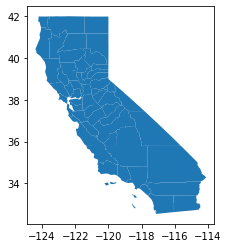

In [29]:
cbounds.plot()

In [30]:
cbounds.columns=['county','cgeo']
cbounds.head()

county                                               cgeo
0           Tulare  POLYGON ((-118.36059 36.74477, -118.36013 36.7...
1        Calaveras  POLYGON ((-120.01995 38.43352, -120.02020 38.4...
2           Merced  POLYGON ((-120.05205 37.18311, -120.05215 37.1...
3  San Luis Obispo  POLYGON ((-120.21398 35.78928, -120.20627 35.7...
4           Sonoma  MULTIPOLYGON (((-122.51299 38.13180, -122.4956...

AttributeError: No geometry data set yet (expected in column 'geometry'.)

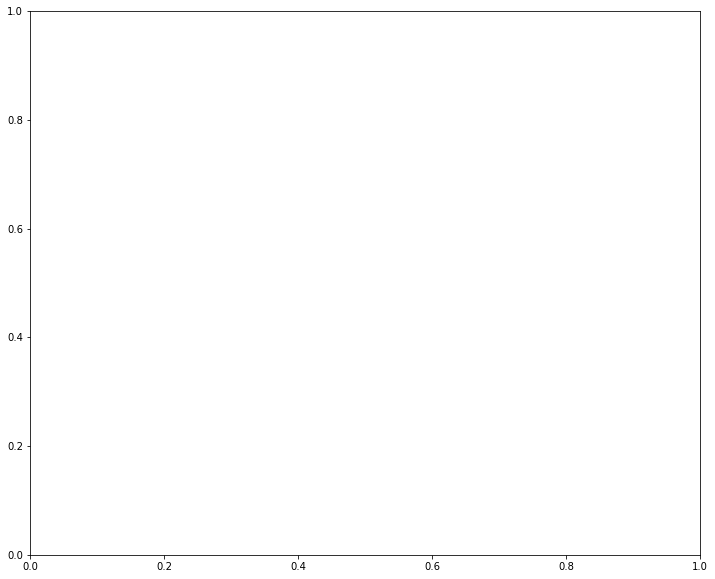

In [31]:
cbounds.plot(figsize=(12,10),color='gainsboro', edgecolor='white')

Don't understand why it says there is no geometry when it literally just plotted a few steps previously?